### Step 1: Image Segmentation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import models, transforms
from PIL import Image
import cv2
import os

model = models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load and preprocess the image
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
    image_tensor = transform(image).unsqueeze(0)
    return image, image_tensor

# Perform segmentation
def perform_segmentation(image_tensor):
    with torch.no_grad():
        predictions = model(image_tensor)
    return predictions

# Post-process and visualize the results
def visualize_results(image, predictions):
    masks = predictions[0]['masks']
    labels = predictions[0]['labels']
    scores = predictions[0]['scores']

    # Set a threshold to filter out low-confidence predictions
    threshold = 0.5
    keep = scores >= threshold
    masks = masks[keep].squeeze().cpu().numpy()
    labels = labels[keep].cpu().numpy()

    # Create a visualization of the masks
    plt.figure(figsize=(12, 12))
    plt.imshow(image)
    for mask in masks:
        plt.imshow(mask, alpha=0.5)
    plt.axis('off')
    plt.show()

# Save masks as separate images
def save_masks(image_path, predictions):
    image, image_tensor = load_image(image_path)
    predictions = perform_segmentation(image_tensor)
    masks = predictions[0]['masks']
    labels = predictions[0]['labels']
    scores = predictions[0]['scores']

    # Set a threshold to filter out low-confidence predictions
    threshold = 0.5
    keep = scores >= threshold
    masks = masks[keep].squeeze().cpu().numpy()
    labels = labels[keep].cpu().numpy()

    # Create a directory to store the mask images
    output_dir = "segmented_objects"
    os.makedirs(output_dir, exist_ok=True)

    # Save each mask as a separate image
    for i, mask in enumerate(masks):
        mask_image = (mask * 255).astype(np.uint8)  # Convert mask to 8-bit image
        mask_image = cv2.cvtColor(mask_image, cv2.COLOR_GRAY2BGR)  # Convert to 3-channel image
        mask_filename = os.path.join(output_dir, f"mask_{i}.png")
        cv2.imwrite(mask_filename, mask_image)
        print(f"Saved mask to {mask_filename}")

# Run the segmentation process
image_path = "data\input_images\cycle.jpg"  # Replace with your image path
save_masks(image_path, perform_segmentation(load_image(image_path)[1]))


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:01<00:00, 147MB/s]  


Saved mask to segmented_objects/mask_0.png
Saved mask to segmented_objects/mask_1.png
Saved mask to segmented_objects/mask_2.png
Saved mask to segmented_objects/mask_3.png
Saved mask to segmented_objects/mask_4.png
Saved mask to segmented_objects/mask_5.png
Saved mask to segmented_objects/mask_6.png
Saved mask to segmented_objects/mask_7.png
Saved mask to segmented_objects/mask_8.png
Saved mask to segmented_objects/mask_9.png
Saved mask to segmented_objects/mask_10.png
Saved mask to segmented_objects/mask_11.png
Saved mask to segmented_objects/mask_12.png
Saved mask to segmented_objects/mask_13.png
Saved mask to segmented_objects/mask_14.png
Saved mask to segmented_objects/mask_15.png
Saved mask to segmented_objects/mask_16.png
Saved mask to segmented_objects/mask_17.png
Saved mask to segmented_objects/mask_18.png
Saved mask to segmented_objects/mask_19.png
Saved mask to segmented_objects/mask_20.png
Saved mask to segmented_objects/mask_21.png
Saved mask to segmented_objects/mask_22.pn

### Step 2 & 3: Object Identification, Extraction and Storage

2024-08-17 20:15:42.262224: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-17 20:15:42.262333: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-17 20:15:42.384873: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


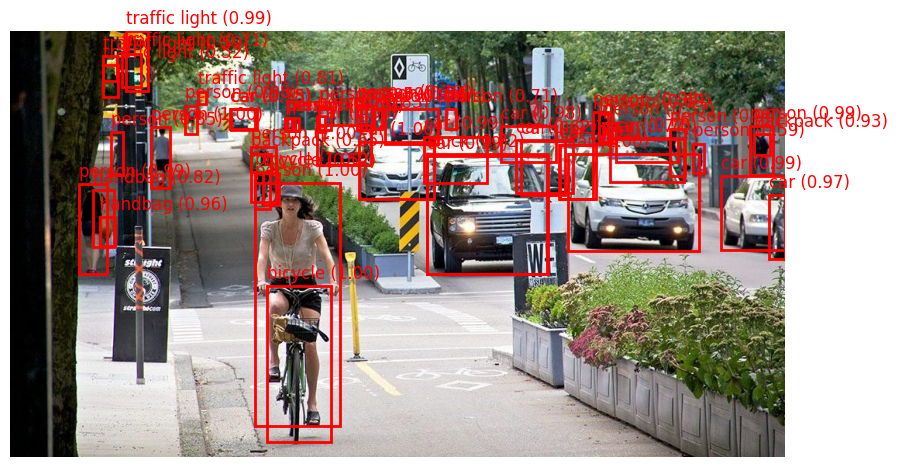

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import requests
from transformers import pipeline

pipe = pipeline("object-detection", model="facebook/detr-resnet-50")

# Load the image
image_path = "data\input_images\cycle.jpg"
image = Image.open(image_path)

# Perform object detection
detections = pipe(image)

# Visualize the detected objects
plt.figure(figsize=(10, 10))
plt.imshow(image)

# Add bounding boxes to the image
for det in detections:
    box = det['box']
    plt.gca().add_patch(plt.Rectangle((box['xmin'], box['ymin']), box['xmax'] - box['xmin'], box['ymax'] - box['ymin'], linewidth=2, edgecolor='red', facecolor='none'))
    plt.text(box['xmin'], box['ymin'] - 10, f"{det['label']} ({det['score']:.2f})", color='red', fontsize=12)

plt.axis('off')
plt.show()


In [3]:
import os
import uuid
import cv2
import numpy as np
from PIL import Image
from transformers import pipeline

# Initialize the YOLO object detection pipeline
pipe = pipeline("object-detection", model="hustvl/yolos-tiny")

# Load the image
image_path = "data\input_images\cycle.jpg"  
image = Image.open(image_path)
image_np = np.array(image)  # Convert image to numpy array

# Perform object detection
detections = pipe(image)

# Create a directory to store the cropped images
output_dir = "extracted_objects_yolo"
os.makedirs(output_dir, exist_ok=True)

# Unique ID for the original image
master_id = str(uuid.uuid4())

# Loop through detected objects and save them
metadata_list = []
for i, det in enumerate(detections):
    box = det['box']
    object_id = str(uuid.uuid4())  # Unique ID for each object
    
    # Crop the object using the bounding box coordinates
    xmin, ymin, xmax, ymax = map(int, [box['xmin'], box['ymin'], box['xmax'], box['ymax']])
    cropped_object = image_np[ymin:ymax, xmin:xmax]
    
    # Save the cropped image
    output_path = os.path.join(output_dir, f"{object_id}.png")
    cv2.imwrite(output_path, cv2.cvtColor(cropped_object, cv2.COLOR_RGB2BGR))
    
    # Store metadata for the object
    metadata = {
        "object_id": object_id,
        "master_id": master_id,
        "box": box,
        "label": det['label'],
        "score": det['score']
    }
    metadata_list.append(metadata)

# Save metadata to a JSON file
import json
metadata_file = "metadata.json"
with open(metadata_file, 'w') as f:
    json.dump(metadata_list, f, indent=4)

print(f"Extracted {len(detections)} objects and saved to {output_dir}")

config.json:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/26.0M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Extracted 61 objects and saved to extracted_objects_yolo


In [17]:
from transformers import pipeline
import numpy as np
from PIL import Image
import os
import uuid

# Initialize the YOLO object detection pipeline
pipe = pipeline("object-detection", model="hustvl/yolos-tiny")

# Define the directory where the extracted objects are stored
extracted_objects_dir = "/kaggle/working/extracted_objects_yolo"

# Loop through each extracted object and perform identification
metadata_list = []
for filename in os.listdir(extracted_objects_dir):
    if filename.endswith(".png"):
        object_image_path = os.path.join(extracted_objects_dir, filename)
        object_image = Image.open(object_image_path)

        # Perform object detection
        detections = pipe(object_image)

        for det in detections:
            box = det['box']
            object_id = str(uuid.uuid4())  # Unique ID for each detected object

            metadata = {
                "object_id": object_id,
                "object_image_path": object_image_path,
                "label": det['label'],
                "score": det['score']
            }
            metadata_list.append(metadata)

# Save metadata to a JSON file
import json
metadata_file = "object_metadata.json"
with open(metadata_file, 'w') as f:
    json.dump(metadata_list, f, indent=4)

print(f"Identified {len(metadata_list)} objects.")


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Identified 45 objects.


In [18]:
metadata_list

[{'object_id': 'b6544d32-acba-42e6-80cc-ef086a9cd7cd',
  'object_image_path': '/kaggle/working/extracted_objects_yolo/a436a914-9d58-4353-af0a-87b0cb9babfe.png',
  'label': 'airplane',
  'score': 0.7340214252471924},
 {'object_id': 'bb5cb3f6-e875-429f-b17b-1993bbff168a',
  'object_image_path': '/kaggle/working/extracted_objects_yolo/cff8be49-bd23-4d8f-90f6-4c8621ed3959.png',
  'label': 'car',
  'score': 0.7725456357002258},
 {'object_id': '20dcd101-3173-4d88-b5f2-9413f7cb3f0a',
  'object_image_path': '/kaggle/working/extracted_objects_yolo/cff8be49-bd23-4d8f-90f6-4c8621ed3959.png',
  'label': 'car',
  'score': 0.6090235114097595},
 {'object_id': '31e129e5-bbb8-4ae4-ae08-28a152219062',
  'object_image_path': '/kaggle/working/extracted_objects_yolo/f2eab14e-acab-485a-96ee-d2f80d99baad.png',
  'label': 'car',
  'score': 0.845231831073761},
 {'object_id': '53342c56-12dd-4455-9a45-75497df515f0',
  'object_image_path': '/kaggle/working/extracted_objects_yolo/d60901f0-b900-4a46-ac58-c5118ffedb

### Step 4 Text/Data Extraction from Objects

In [19]:
from transformers import pipeline

pipe_img_to_text = pipeline("image-to-text", model="Salesforce/blip-image-captioning-large")

def extract_text_from_image_easyocr(image_path):
    return pipe_img_to_text(image_path)


segmented_objects_dir = "tables\models\extracted_objects_yolo"
metadata_list = []

for filename in os.listdir(segmented_objects_dir):
    if filename.endswith(".png"):
        object_image_path = os.path.join(segmented_objects_dir, filename)

        # Extract text from each image
        extracted_text = extract_text_from_image_easyocr(object_image_path)

        # Append to metadata
        metadata = {
            "object_image_path": object_image_path,
            "extracted_text": extracted_text
        }
        metadata_list.append(metadata)

# Save metadata with extracted text to a JSON file
import json
metadata_file = "object_text_metadata_yolo.json"
with open(metadata_file, 'w') as f:
    json.dump(metadata_list, f, indent=4)

print(f"Extracted text from {len(metadata_list)} objects.")

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Extracted text from 61 objects.


In [16]:
metadata_list

[{'object_image_path': '/kaggle/working/extracted_objects_yolo/a436a914-9d58-4353-af0a-87b0cb9babfe.png',
  'extracted_text': [{'generated_text': 'cars parked on the side of the road near a street sign'}]},
 {'object_image_path': '/kaggle/working/extracted_objects_yolo/8d189a22-9603-4dd4-95da-0a98ea54be6f.png',
  'extracted_text': [{'generated_text': 'there are many cars parked in a parking lot with a bird on the roof'}]},
 {'object_image_path': '/kaggle/working/extracted_objects_yolo/dc317100-5729-4109-9730-4c2ecd443483.png',
  'extracted_text': [{'generated_text': 'there is a blurry photo of a television in a living room'}]},
 {'object_image_path': '/kaggle/working/extracted_objects_yolo/cff8be49-bd23-4d8f-90f6-4c8621ed3959.png',
  'extracted_text': [{'generated_text': 'araffes are driving down the street in traffic with a car'}]},
 {'object_image_path': '/kaggle/working/extracted_objects_yolo/1056b658-feb2-456f-8e93-b8d1a444396d.png',
  'extracted_text': [{'generated_text': 'there i

### Step 5: Summarize Object Attributes

In [20]:
from transformers import pipeline

pipe_summarize = pipeline("summarization", model="facebook/bart-large-cnn")
with open("tables\models\object_text_metadata_yolo.json", "r") as json_file:
    extracted_data = json.load(json_file)

summarized_data = []

for data_entry in extracted_data:
    text = data_entry["extracted_text"][0]['generated_text']
    summary = pipe_summarize(text, max_length=50, min_length=25, do_sample=False)[0]['summary_text']
    
    data_entry["summary"] = summary
    summarized_data.append(data_entry)

# Save summarized data to a JSON file
with open("summarized_data.json", "w") as json_file:
    json.dump(summarized_data, json_file, indent=4)

print(f"Generated summaries for {len(summarized_data)} objects.")


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Your max_length is set to 50, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 50, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 50, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 50, but your input_length is only 16. Since this is a summarization task, where outputs

Generated summaries for 61 objects.


In [21]:
summarized_data

[{'object_image_path': '/kaggle/working/extracted_objects_yolo/a436a914-9d58-4353-af0a-87b0cb9babfe.png',
  'extracted_text': [{'generated_text': 'cars parked on the side of the road near a street sign'}],
  'summary': 'Cars were parked on the side of the road near a street sign. The incident happened in the early hours of the morning. Police are still investigating.'},
 {'object_image_path': '/kaggle/working/extracted_objects_yolo/8d189a22-9603-4dd4-95da-0a98ea54be6f.png',
  'extracted_text': [{'generated_text': 'there are many cars parked in a parking lot with a bird on the roof'}],
  'summary': 'There are many cars parked in a parking lot with a bird on the roof. There are also many cars in the parking lot that have a bird in the window.'},
 {'object_image_path': '/kaggle/working/extracted_objects_yolo/dc317100-5729-4109-9730-4c2ecd443483.png',
  'extracted_text': [{'generated_text': 'there is a blurry photo of a television in a living room'}],
  'summary': 'There is a blurry photo 

### Step 6: Data Mapping

In [22]:
mapped_data = []
for index, data_entry in enumerate(summarized_data):
    mapped_entry = {
        "object_id": f"object_{index+1}",
        "image_filename": data_entry["object_image_path"], 
        "extracted_text": data_entry["extracted_text"],
        "summary": data_entry["summary"]
    }
    mapped_data.append(mapped_entry)

# Save mapped data to a JSON file
with open("mapped_data.json", "w") as json_file:
    json.dump(mapped_data, json_file, indent=4)

print(f"Mapped data for {len(mapped_data)} objects.")


Mapped data for 61 objects.


### Step 7: Output Generation

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw


# Generate a table summarizing the data
df = pd.DataFrame(mapped_data)
df.to_csv("summary_table.csv", index=False)

# Annotate original image with segmented objects
original_image_path = "data\input_images\cycle.jpg" 
print("Summary table saved as 'summary_table.csv'.")

Summary table saved as 'summary_table.csv'.


Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Hardware accelerator e.g. GPU is available in the environment, but no `device` argum

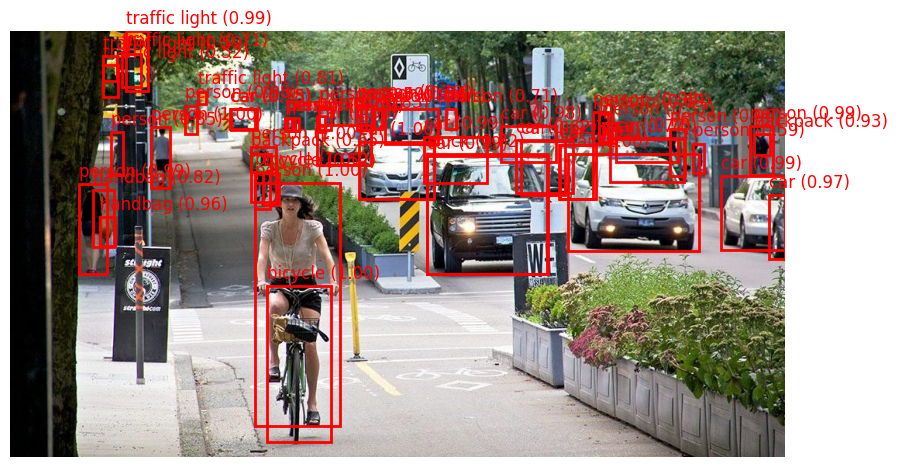

<Figure size 640x480 with 0 Axes>

In [24]:
from PIL import Image
import matplotlib.pyplot as plt
import requests
from transformers import pipeline

# Initialize the object detection pipeline with DETR model
pipe = pipeline("object-detection", model="facebook/detr-resnet-50")

# Load the image
image_path = "data\input_images\cycle.jpg"
image = Image.open(image_path)

# Perform object detection
detections = pipe(image)

# Visualize the detected objects
plt.figure(figsize=(10, 10))
plt.imshow(image)

# Add bounding boxes and labels to the image
for det in detections:
    box = det['box']
    plt.gca().add_patch(
        plt.Rectangle(
            (box['xmin'], box['ymin']),
            box['xmax'] - box['xmin'],
            box['ymax'] - box['ymin'],
            linewidth=2,
            edgecolor='red',
            facecolor='none'
        )
    )
    plt.text(
        box['xmin'], 
        box['ymin'] - 10, 
        f"{det['label']} ({det['score']:.2f})", 
        color='red', 
        fontsize=12
    )

plt.axis('off')
plt.show()
output_path = "/kaggle/working/detected_objects.png"
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)

# Optionally display the image
plt.show()
